# Regresión con Scikit-learn

**Autor:** Roberto Muñoz <br />
**Github:** <https://github.com/rpmunoz> <br />

[Scikit-learn](https://scikit-learn.org/stable/) es una biblioteca para aprendizaje de máquina de software libre para el lenguaje de programación Python.1​ Incluye varios algoritmos de clasificación, regresión y análisis de grupos entre los cuales están máquinas de vectores de soporte, bosques aleatorios, Gradient boosting, K-means y DBSCAN. Está diseñada para interoperar con las bibliotecas numéricas y científicas NumPy y SciPy

In [1]:
import numpy as np
import pandas as pd
import sklearn

from sklearn import datasets

diabetes = datasets.load_diabetes()
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [2]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [3]:
# Creamos un dataframe a partir del dataset cargado desde scikit-learn

diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df["avance"]=diabetes.target

print("Tamaño del dataset: ", len(diabetes_df))
diabetes_df.head()

Tamaño del dataset:  442


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,avance
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


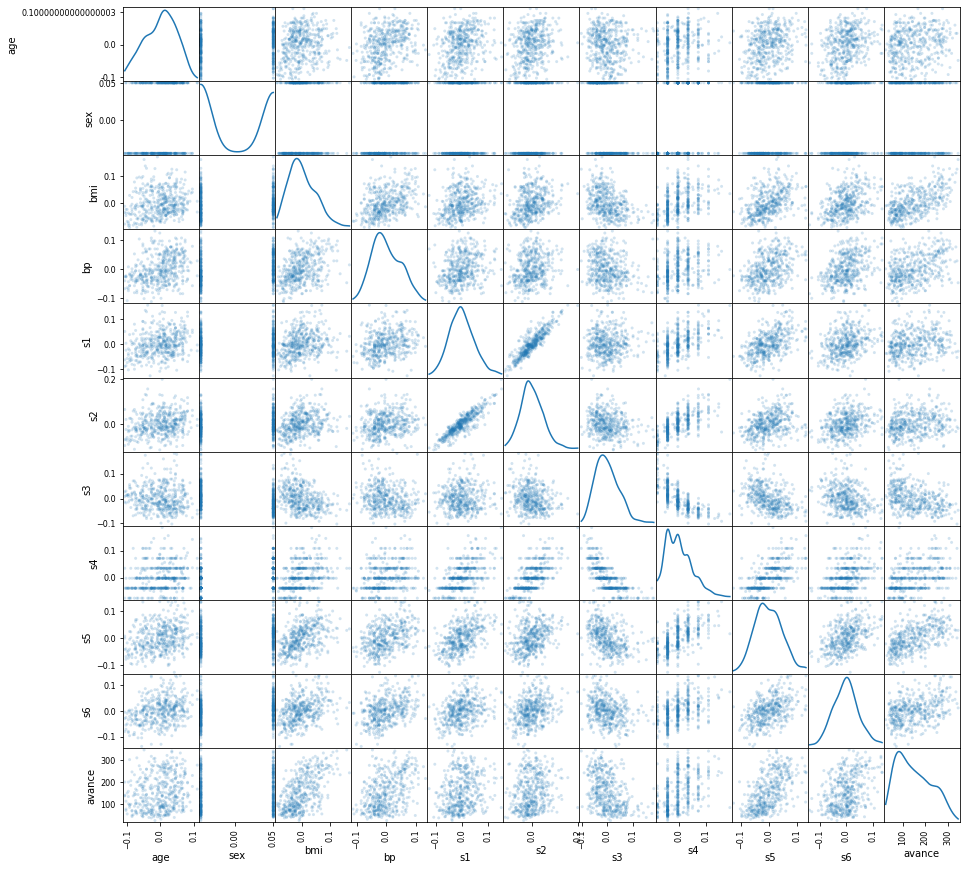

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

from pandas.plotting import scatter_matrix

plot=scatter_matrix(diabetes_df, alpha=0.2, figsize=[15, 15], marker=".", diagonal='kde')

Train 75%

Validation 15%

Test 10%

In [5]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(diabetes_df, test_size=0.3)

print("Tamaño del train set: ", len(df_train))
print("Tamaño del test set: ", len(df_test))

Tamaño del train set:  309
Tamaño del test set:  133


# 2. Regresión lineal

$$ \text{min}_{\mathbf{w}, b} \sum_i || \mathbf{w}^\mathsf{T}\mathbf{x}_i + b  - y_i||^2 $$

## 2.1 Caso simple (1 feature)

Partiremos consturyendo un modelo lineal usando el campo bmi, el cual corresponde a la columna numero 2

Usaremos la función LinearRegression que permite crear un modelo lineal usando la regresión de mínimos cuadrados.

In [6]:
#df_train.iloc[:,2]

In [7]:
#df_train.iloc[:,10]

In [8]:
X_train=np.array(df_train.iloc[:,2])[np.newaxis].T
y_train=np.array(df_train.iloc[:,10])

X_test=np.array(df_test.iloc[:,2])[np.newaxis].T
y_test=np.array(df_test.iloc[:,10])

In [9]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train, y_train)

print("R^2 en entrenamiento: %f" % regr.score(X_train, y_train))
print("R^2 en test: %f" % regr.score(X_test, y_test))

R^2 en entrenamiento: 0.312363
R^2 en test: 0.407706


In [10]:
print(regr.coef_)

[951.59815116]


In [11]:
y_pred = regr.predict(X_test)
print(y_pred)

[253.16044787  89.05741158 173.16021768 241.87836412 167.00635382
 111.62157907 144.44218633  99.31385135  91.10869953 194.69874119
  87.00612363 145.4678303  132.1344586   73.67275193 145.4678303
 245.98094003  75.72403988 204.95518096  90.08305556 145.4678303
 173.16021768 123.92930679 101.3651393  125.98059474 143.41654235
 204.95518096 133.16010258 121.87801884 118.80108691 167.00635382
 144.44218633 215.21162073 110.59593509 270.59639547 186.49358938
 182.39101347  88.0317676  124.95495077 116.74979895 122.90366281
 221.36548459 211.10904482  83.92919169 143.41654235 121.87801884
 211.10904482 275.72461536 132.1344586  104.44207123 142.39089837
 306.49393466 272.64768343  91.10869953 122.90366281 187.51923335
 134.18574656 193.67309721 129.05752667 159.82684598 219.31419663
 258.28866775  94.18563146 222.39112856 219.31419663 135.21139054
 218.28855266 105.46771521 129.05752667 241.87836412 175.21150563
 205.98082493 108.54464714 237.77578822 212.1346888  131.10881463
 152.6473381

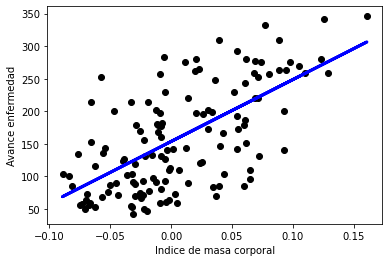

In [12]:
# Usaremos el campo bmi para graficar el ajuste lineal

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xlabel('Indice de masa corporal')
plt.ylabel('Avance enfermedad')

plt.show()

## 2.2 Análisis usando librería Statsmodels

[Statsmodels](https://www.statsmodels.org) es una librería nos brinda un gran número de herramientas para explorar datos, estimar modelos estadísticos, realizar pruebas estadísticas y muchas cosas más.

In [14]:
import statsmodels.api as sm

En Stasmodels necesitamos llevar la variable X_train a un formato de N_observaciones x N_features

In [15]:
y_train_sm = y_train
X_train_sm = sm.add_constant(X_train)

y_test_sm = y_test
X_test_sm = sm.add_constant(X_test)

In [16]:
olsmod = sm.OLS(y_train_sm, X_train_sm)

olsres = olsmod.fit()

print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     139.5
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           8.75e-27
Time:                        13:52:28   Log-Likelihood:                -1718.1
No. Observations:                 309   AIC:                             3440.
Df Residuals:                     307   BIC:                             3448.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.4247      3.597     42.655      0.0

In [17]:
y_pred = olsres.predict(X_test_sm)
print(y_pred[0:10])

[253.16044787  89.05741158 173.16021768 241.87836412 167.00635382
 111.62157907 144.44218633  99.31385135  91.10869953 194.69874119]


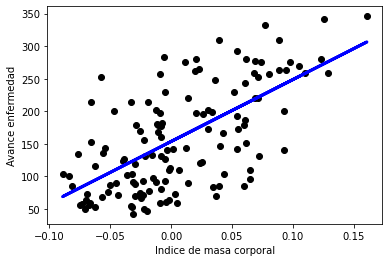

In [18]:
# Usaremos el campo bmi para graficar el ajuste lineal

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xlabel('Indice de masa corporal')
plt.ylabel('Avance enfermedad')

plt.show()

## 2.3 Caso multivariado (Todos los features)

Usaremos todos los features para generar un modelo lineal

In [19]:
X_train=np.array(df_train.iloc[:,0:10])
y_train=np.array(df_train.iloc[:,10])

X_test=np.array(df_test.iloc[:,0:10])
y_test=np.array(df_test.iloc[:,10])

In [20]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train, y_train)

print("R^2 en entrenamiento: %f" % regr.score(X_train, y_train))
print("R^2 en test: %f" % regr.score(X_test, y_test))

R^2 en entrenamiento: 0.492185
R^2 en test: 0.560971


In [21]:
print(regr.coef_)

[  19.78375842 -205.79760286  491.52162296  335.56118035 -740.09032039
  530.78042195   54.65777826   98.03355828  718.04568052   75.87822448]


## 2.4 Construcción de curva de aprendizaje

Scikit-learn permite calcular la curva de aprendizaje usando la función learning_curve. Es una herramienta que permite determinar cuanto ganamos al agregar mas datos al set de entrenamiento y determinar si el estimador sufre de un error de varianza o un erro de bias.

In [22]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(est, X, y, train_sizes=np.linspace(.1, 1, 20))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--', label="puntuaciones de entrenamiento " + estimator_name)
    plt.plot(training_set_size, test_scores.mean(axis=1), '-', label="puntuaciones de test " + estimator_name, c=line[0].get_color())
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.legend(loc='best')
    plt.ylim(-0.1, 1.1)


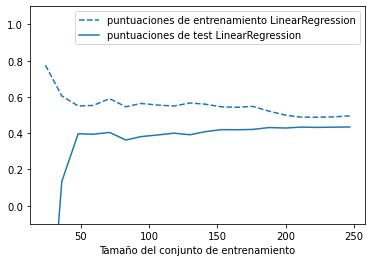

In [23]:
X=np.array(diabetes_df.iloc[:,0:10])
y=np.array(diabetes_df.iloc[:,10])

plt.figure()
plot_learning_curve(LinearRegression(), X_train, y_train)

# 3. Regresión de cresta (*Ridge Regression*, penalización L2)

**El estimador de cresta (``Ridge``)** es una regularización simple (llamada regularización L2) para el modelo LinearRegression. En particular, tiene el beneficio de no ser más costoso computacionalmente que la estimación basada en mínimos cuadrados.

$$ \text{min}_{\mathbf{w},b}  \sum_i || \mathbf{w}^\mathsf{T}\mathbf{x}_i + b  - y_i||^2  + \alpha ||\mathbf{w}||_2^2$$ 

In [24]:
x=range(10)
for i in x:
    print(i)

0
1
2
3
4
5
6
7
8
9


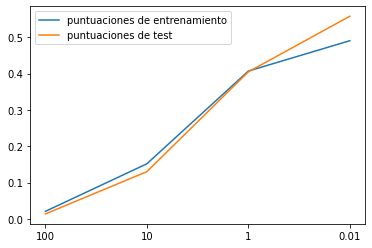

In [25]:
from sklearn.linear_model import Ridge

ridge_models = {}
training_scores = []
test_scores = []

for alpha in [100, 10, 1, .01]:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    training_scores.append(ridge.score(X_train, y_train))
    test_scores.append(ridge.score(X_test, y_test))
    ridge_models[alpha] = ridge

plt.figure()
plt.plot(training_scores, label="puntuaciones de entrenamiento")
plt.plot(test_scores, label="puntuaciones de test")
plt.xticks(range(4), [100, 10, 1, .01])
plt.legend(loc="best")

La cantidad de regularización se ajusta a través del parámetro `alpha` del modelo Ridge.

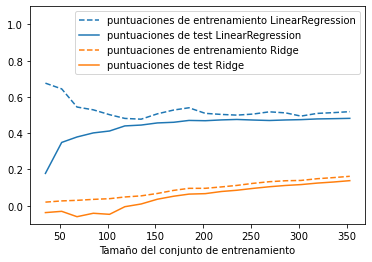

In [26]:
plt.figure()
plot_learning_curve(LinearRegression(), X, y)
plot_learning_curve(Ridge(alpha=10), X, y)

In [27]:
alphas = np.logspace(-4, -1, 6)
print("Alphas: ", alphas)

ridge = Ridge(alpha=.1)
scores = [ridge.set_params(alpha=alpha).fit(X_train, y_train,).score(X_test, y_test) for alpha in alphas]
print("Score: ", scores) 

best_alpha = alphas[scores.index(max(scores))]
print("Best alpha: ", best_alpha)

Alphas:  [0.0001     0.00039811 0.00158489 0.00630957 0.02511886 0.1       ]
Score:  [0.5609406862016331, 0.5608470090857325, 0.5604499084294474, 0.5590014007052027, 0.5551738697687961, 0.541749021748444]
Best alpha:  0.0001


# 4. Lasso (penalización L1)
**El estimador ``Lasso``** es útil para conseguir imponer dispersión en los coeficientes. En otras palabras, se debería preferir esta penalización si creemos que muchas de las características no son relevantes. Se consigue a través de la regularización L1.

$$ \text{min}_{\mathbf{w}, b} \sum_i \frac{1}{2} || \mathbf{w}^\mathsf{T}\mathbf{x}_i + b  - y_i||^2  + \alpha ||\mathbf{w}||_1$$ 

Del primer gráfico podemos ver que el campo sex no aporta mucha información en la predicción de la variable avance de enfermedad.

In [28]:
from sklearn.linear_model import Lasso

lasso = Lasso()
scores = [lasso.set_params(alpha=alpha).fit(X_train, y_train).score(X_test, y_test) for alpha in alphas]
best_alpha = alphas[scores.index(max(scores))]

print("Best alpha: ", best_alpha)

lasso.alpha = best_alpha
lasso.fit(X_train, y_train)

Best alpha:  0.0001


Lasso(alpha=0.0001)

In [29]:
print(lasso.coef_)

[  19.75384163 -205.70427423  491.55203779  335.51162641 -733.3831378
  525.72341151   51.4052447    96.69405439  715.61141117   75.91637488]
